In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append("..")
from basic_tools import *
from resnet_models import *
print(torch.cuda.is_available())

True


In [2]:
#一些参数的设置
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
learning_rate=0.05
momentum=0.9
weight_decay=0.0001
batch_size=128
epochs=100
data_path='E:/深度学习/ResNet18_from_Scratch_using_PyTorch/data'
model_name='ResNet18_test_normal_v2'+'epoch='+str(epochs)
print(device)
model=ResNet_normal(BasicBlock_v2,[2,2,2,2]).to(device)
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)


cuda:0


In [3]:
#数据集的加载
trainloader,testloader=get_data_loaders(train_batch_size=batch_size,test_batch_size=batch_size,data_path=data_path)

epoch:0,train_loss:3.7712,train_acc:12.4860,train_top5_acc:35.4980,test_loss:4.0190,test_acc:17.0400,test_top5_acc:44.2800
epoch:1,train_loss:3.1785,train_acc:21.9740,train_top5_acc:51.7440,test_loss:2.9518,test_acc:26.4200,test_top5_acc:56.7900
epoch:2,train_loss:2.8407,train_acc:28.2560,train_top5_acc:59.8460,test_loss:2.6593,test_acc:31.3600,test_top5_acc:63.9900
epoch:3,train_loss:2.6044,train_acc:32.6300,train_top5_acc:65.3320,test_loss:2.4660,test_acc:35.5800,test_top5_acc:67.9000
epoch:4,train_loss:2.4395,train_acc:36.4180,train_top5_acc:68.9200,test_loss:2.3588,test_acc:38.6300,test_top5_acc:70.5300
epoch:5,train_loss:2.2997,train_acc:39.5740,train_top5_acc:71.6440,test_loss:2.2240,test_acc:41.3500,test_top5_acc:73.0300
epoch:6,train_loss:2.1944,train_acc:41.7540,train_top5_acc:73.8900,test_loss:2.1590,test_acc:42.4300,test_top5_acc:74.7600
epoch:7,train_loss:2.0815,train_acc:44.1300,train_top5_acc:75.9520,test_loss:2.0697,test_acc:44.9300,test_top5_acc:75.9800
epoch:8,train_lo

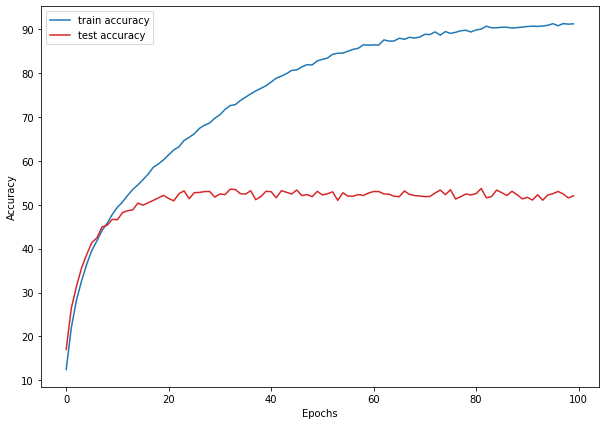

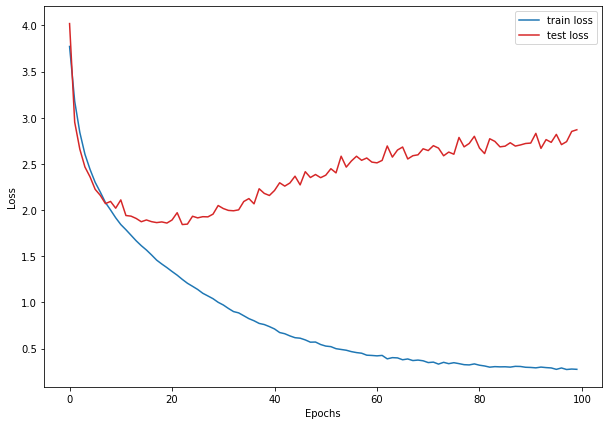

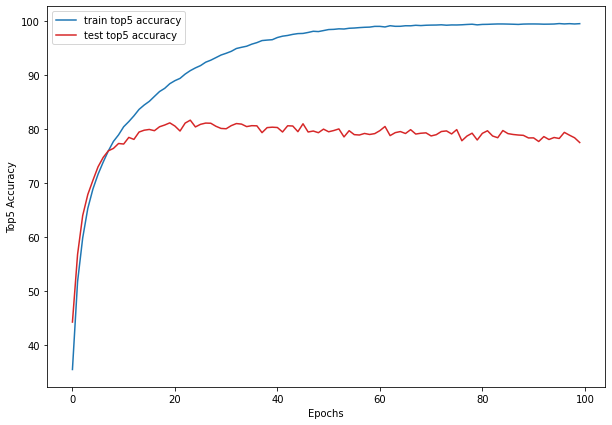

In [4]:
#训练之
train_lossa, test_lossa = [], []
train_acca, test_acca = [], []
train_top5_acca, test_top5_acca = [], []
for epoch in range(epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

#画图
save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)


In [5]:
#固定模型
import os
modelpath='../models/'
if not os.path.exists(modelpath):
    os.makedirs(modelpath)
torch.save(model.state_dict(),modelpath+model_name+'.pth')



In [6]:
check_model_info(model)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
Flops:37280768.0 params:11226916.0



In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append("..")
sys.path.append("../jinleqing")
from basic_tools import *
from resnet_models import *
from FcaNet_Model import *
print(torch.cuda.is_available())
modelt=fcanet().to('cuda')
check_model_info(modelt)

True
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
Flops:1769446912.0 params:11307172.0

